In [373]:
#IMPORT DEPENDENCIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import collections
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [374]:
#import dataset
DATA = pd.read_csv("train.csv")

In [375]:
#Display the upper part of the dataset
DATA.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [376]:
#Drop the ID Column
DATA = DATA.drop('Id', axis = 1)

In [377]:
#Display the upper part of the dataset
DATA.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [378]:
#Display the bottom part of the dataset
DATA.tail()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
15115,2607,243,23,258,7,660,170,251,214,1282,...,0,0,0,0,0,0,0,0,0,3
15116,2603,121,19,633,195,618,249,221,91,1325,...,0,0,0,0,0,0,0,0,0,3
15117,2492,134,25,365,117,335,250,220,83,1187,...,0,0,0,0,0,0,0,0,0,3
15118,2487,167,28,218,101,242,229,237,119,932,...,0,0,0,0,0,0,0,0,0,3
15119,2475,197,34,319,78,270,189,244,164,914,...,0,0,0,0,0,0,0,0,0,3


In [379]:
DATA.shape

(15120, 55)

In [380]:
#Make sure Data is in place
DATA.sort_index(inplace = True)

In [381]:
DATA.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [402]:
DATA.tail()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
15115,2607,243,23,258,7,660,170,251,214,1282,...,0,0,0,0,0,0,0,0,0,3
15116,2603,121,19,633,195,618,249,221,91,1325,...,0,0,0,0,0,0,0,0,0,3
15117,2492,134,25,365,117,335,250,220,83,1187,...,0,0,0,0,0,0,0,0,0,3
15118,2487,167,28,218,101,242,229,237,119,932,...,0,0,0,0,0,0,0,0,0,3
15119,2475,197,34,319,78,270,189,244,164,914,...,0,0,0,0,0,0,0,0,0,3


In [382]:
#Extract the features of the DataSet
features = DATA.drop('Cover_Type', axis = 1)

In [383]:
#Extract the target(Cover Type) that needs to be predicted
target = DATA.Cover_Type

In [384]:
#Display the features
display(features[0:10])

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,0
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,0
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,0
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,0
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,0
5,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,0
6,2606,45,7,270,5,633,222,225,138,6256,...,0,0,0,0,0,0,0,0,0,0
7,2605,49,4,234,7,573,222,230,144,6228,...,0,0,0,0,0,0,0,0,0,0
8,2617,45,9,240,56,666,223,221,133,6244,...,0,0,0,0,0,0,0,0,0,0
9,2612,59,10,247,11,636,228,219,124,6230,...,0,0,0,0,0,0,0,0,0,0


In [401]:
#Display the Cover Type
display(target[0:10])

0    5
1    5
2    2
3    2
4    5
5    2
6    5
7    5
8    5
9    5
Name: Cover_Type, dtype: int64

In [385]:
#split the data into test and train data
features_train, target_train = features[0:12096], target[0:12096]
features_test, target_test = features[12096:], target[12096:]

In [386]:
#Create a Gaussian Naive Bayes Classifier
model = GaussianNB()

In [387]:
#Train the model using the training dataset
model.fit(features_train, target_train)

GaussianNB()

In [388]:
#Predict the Cover Type from test dataset
Predicted_Values = model.predict(features_test)

In [389]:
# Model Accuracy
model.score(features_test, target_test)

0.6097883597883598

In [390]:
# Model Accuracy, how often has the Classifier predicted the correct target
accuracy_score(target_test, Predicted_Values)

0.6097883597883598

In [391]:
#Classification Report
print(classification_report(target_test, Predicted_Values))

              precision    recall  f1-score   support

           1       0.56      0.73      0.63       364
           2       0.50      0.02      0.04       249
           3       0.41      0.75      0.53       511
           4       0.69      0.92      0.79       530
           5       0.65      0.65      0.65       368
           6       0.64      0.06      0.10       505
           7       0.89      0.87      0.88       497

    accuracy                           0.61      3024
   macro avg       0.62      0.57      0.52      3024
weighted avg       0.63      0.61      0.55      3024



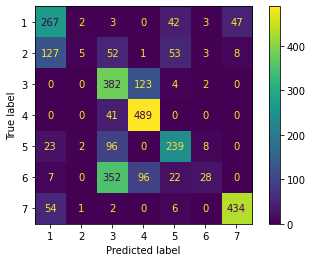

In [392]:
#Plot Confusion Matrix for the Classifier
CMatrix = confusion_matrix(target_test, Predicted_Values,labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=CMatrix, display_labels=model.classes_)
disp.plot()
plt.show()

In [393]:
#Load an Unkown datatest for Cover Type Prediction
TestDATA = pd.read_csv("test.csv")

In [394]:
#Display the upper part of the dataset to view data
TestDATA.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,15121,2680,354,14,0,0,2684,196,214,156,...,0,0,0,0,0,0,0,0,0,0
1,15122,2683,0,13,0,0,2654,201,216,152,...,0,0,0,0,0,0,0,0,0,0
2,15123,2713,16,15,0,0,2980,206,208,137,...,0,0,0,0,0,0,0,0,0,0
3,15124,2709,24,17,0,0,2950,208,201,125,...,0,0,0,0,0,0,0,0,0,0
4,15125,2706,29,19,0,0,2920,210,195,115,...,0,0,0,0,0,0,0,0,0,0


In [403]:
TestDATA.tail()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
565887,581008,2396,153,20,85,17,108,240,237,118,...,0,0,0,0,0,0,0,0,0,0
565888,581009,2391,152,19,67,12,95,240,237,119,...,0,0,0,0,0,0,0,0,0,0
565889,581010,2386,159,17,60,7,90,236,241,130,...,0,0,0,0,0,0,0,0,0,0
565890,581011,2384,170,15,60,5,90,230,245,143,...,0,0,0,0,0,0,0,0,0,0
565891,581012,2383,165,13,60,4,67,231,244,141,...,0,0,0,0,0,0,0,0,0,0


In [395]:
#Extract the features of the DataSet
TestFeatures = TestDATA.drop('Id', axis = 1)

In [396]:
#Display the upper part of the dataset to check wheter ID has been removed
TestFeatures.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,2680,354,14,0,0,2684,196,214,156,6645,...,0,0,0,0,0,0,0,0,0,0
1,2683,0,13,0,0,2654,201,216,152,6675,...,0,0,0,0,0,0,0,0,0,0
2,2713,16,15,0,0,2980,206,208,137,6344,...,0,0,0,0,0,0,0,0,0,0
3,2709,24,17,0,0,2950,208,201,125,6374,...,0,0,0,0,0,0,0,0,0,0
4,2706,29,19,0,0,2920,210,195,115,6404,...,0,0,0,0,0,0,0,0,0,0


In [397]:
#Predict the Cover Type
CoverType = model.predict(TestFeatures)

In [398]:
#Display the 1st 400 cover types in the data set
display(CoverType[0:400])

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5,

In [404]:
#Frequency of of predicted Clasess
Frequency =collections.Counter(CoverType)
DF=pd.DataFrame(Frequency.items())
DF.columns=['Cover Type','Frequency']
DF = DF.sort_values(by='Cover Type')
Table = DF.set_index('Cover Type')
display(Table)

,Frequency
Cover Type,
1,285130
2,49441
3,58536
4,12835
5,105755
6,7550
7,46645


<AxesSubplot:xlabel='Cover Type'>

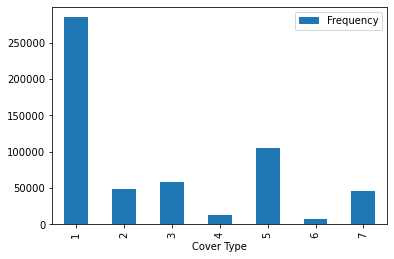

In [405]:
#Bar Graph of Frequency Vs Classes
DF.plot(kind='bar',x ='Cover Type',y='Frequency')